# **1. Exploring and Understanding 'loan.csv'**

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,confusion_matrix,classification_report
import pickle
import shap
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
# Displays statistical information
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [4]:
# Check null values.
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
# Displays column labels
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
# Displays dimensions of the DataFrame
df.shape

(45000, 14)

In [7]:
# Checking the dataset whether it's having duplicate values or not
df.duplicated().sum()


0

# **2. Data Visualization:**

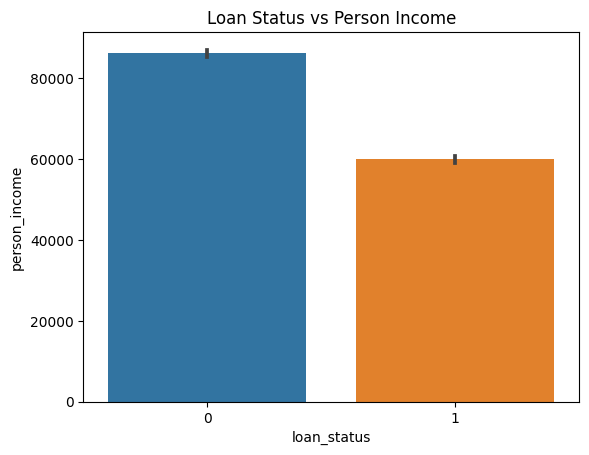

In [8]:
# Plotting the bar graph with loan_status and loan_duration and saving the png file
sns.barplot(x= 'loan_status', y = 'person_income' ,data = df)
plt.title('Loan Status vs Person Income')
plt.savefig('Loan Status vs Person Income.png')
plt.show()


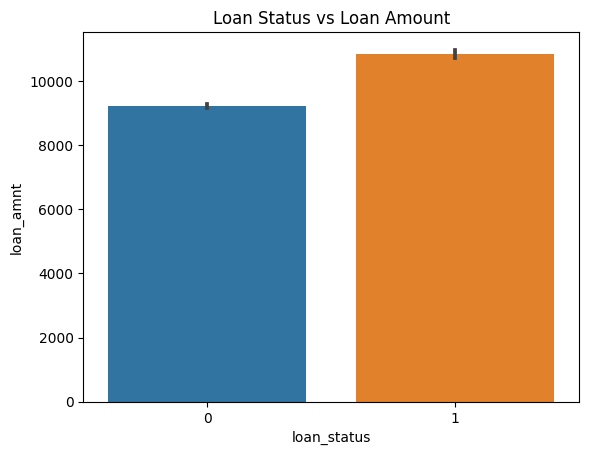

In [9]:
# Plotting the bar graph with loan_status and loan_amount and saving the png file
sns.barplot(x= 'loan_status', y = 'loan_amnt' ,data = df)
plt.title('Loan Status vs Loan Amount')
plt.savefig('Loan Status vs Loan Amount.png')
plt.show()


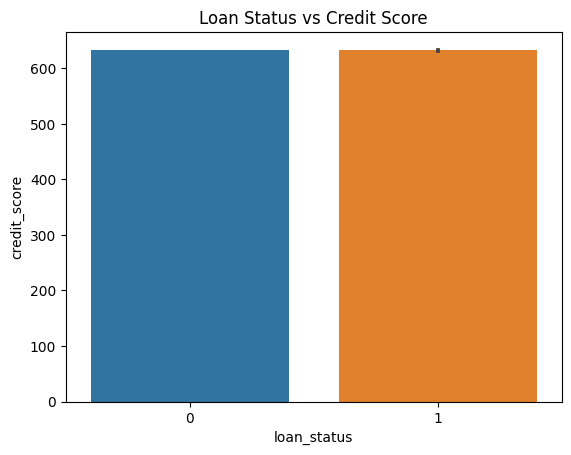

In [10]:
# Plotting the bar graph with loan_status and credit_score and saving the png file
sns.barplot(x= 'loan_status', y = 'credit_score' ,data = df)
plt.title('Loan Status vs Credit Score')
plt.savefig('Loan Status vs Credit Score.png')
plt.show()

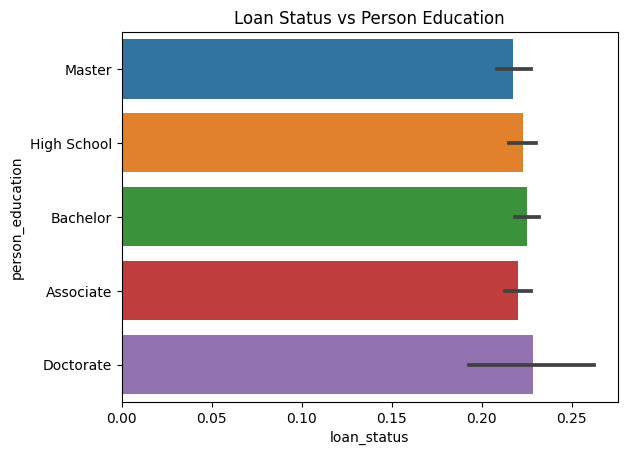

In [11]:
# Plotting the bar graph with loan_status and person_education and saving the png file
sns.barplot(x= 'loan_status', y = 'person_education' ,data = df)
plt.title('Loan Status vs Person Education')
plt.savefig('Loan Status vs Person Education.png')
plt.show()

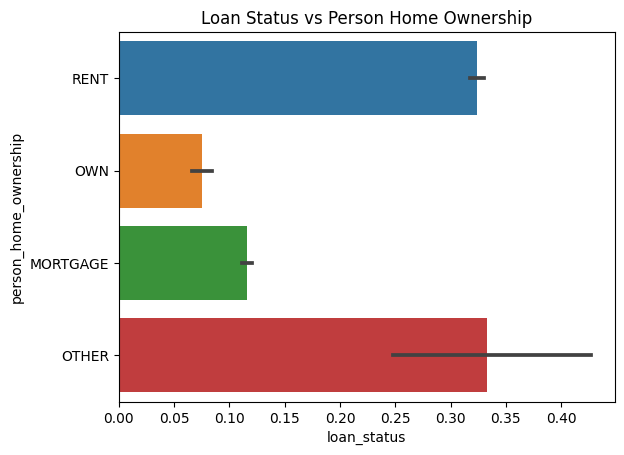

In [12]:
# Plotting the bar graph with loan_status and person_home_ownership and saving the png file
sns.barplot(x= 'loan_status', y = 'person_home_ownership' ,data = df)
plt.title('Loan Status vs Person Home Ownership')
plt.savefig('Loan Status vs Person Home Ownership.png')
plt.show()

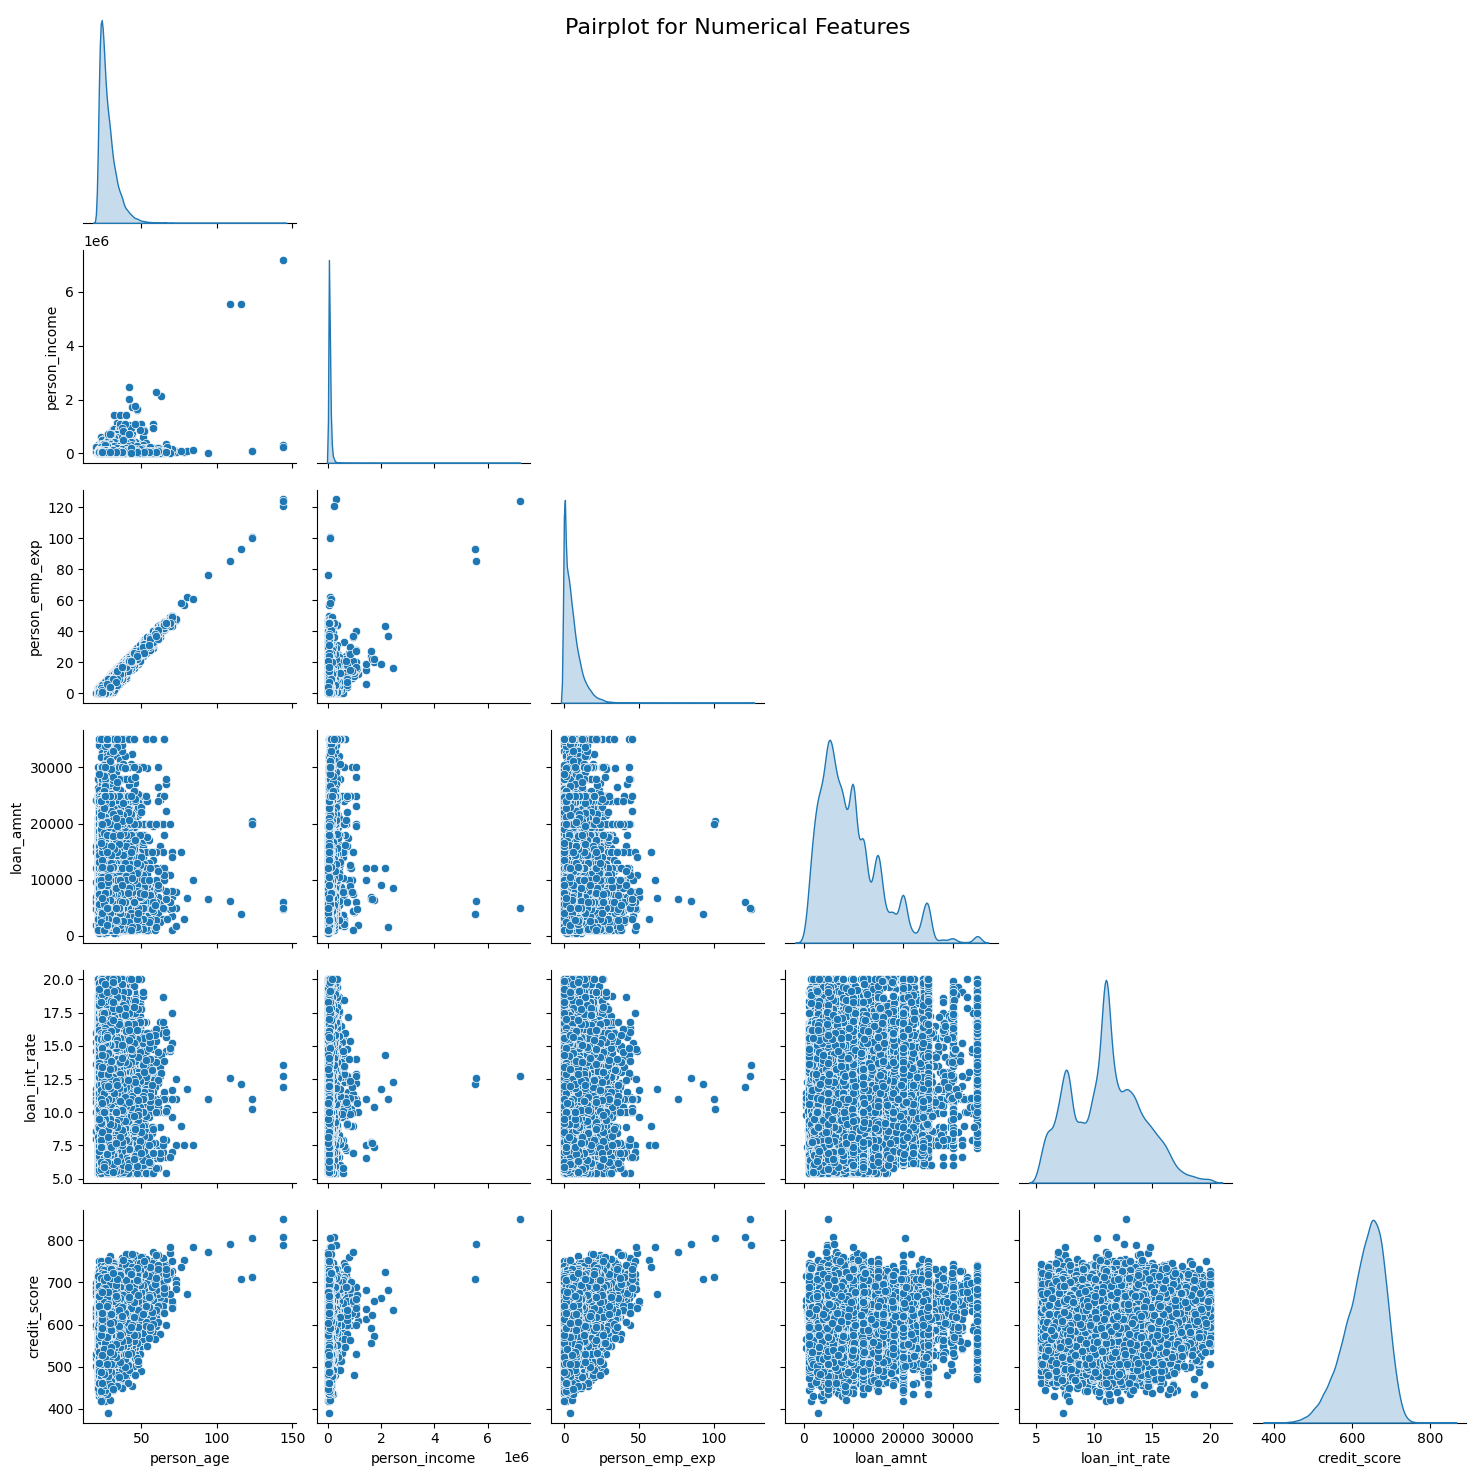

In [13]:
# Pairplot for numerical features
# Define numerical columns for visualization
num_cols = ["person_age", "person_income", "person_emp_exp", "loan_amnt", "loan_int_rate", "credit_score"]
sns.pairplot(df[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot for Numerical Features", fontsize=16)
plt.show()


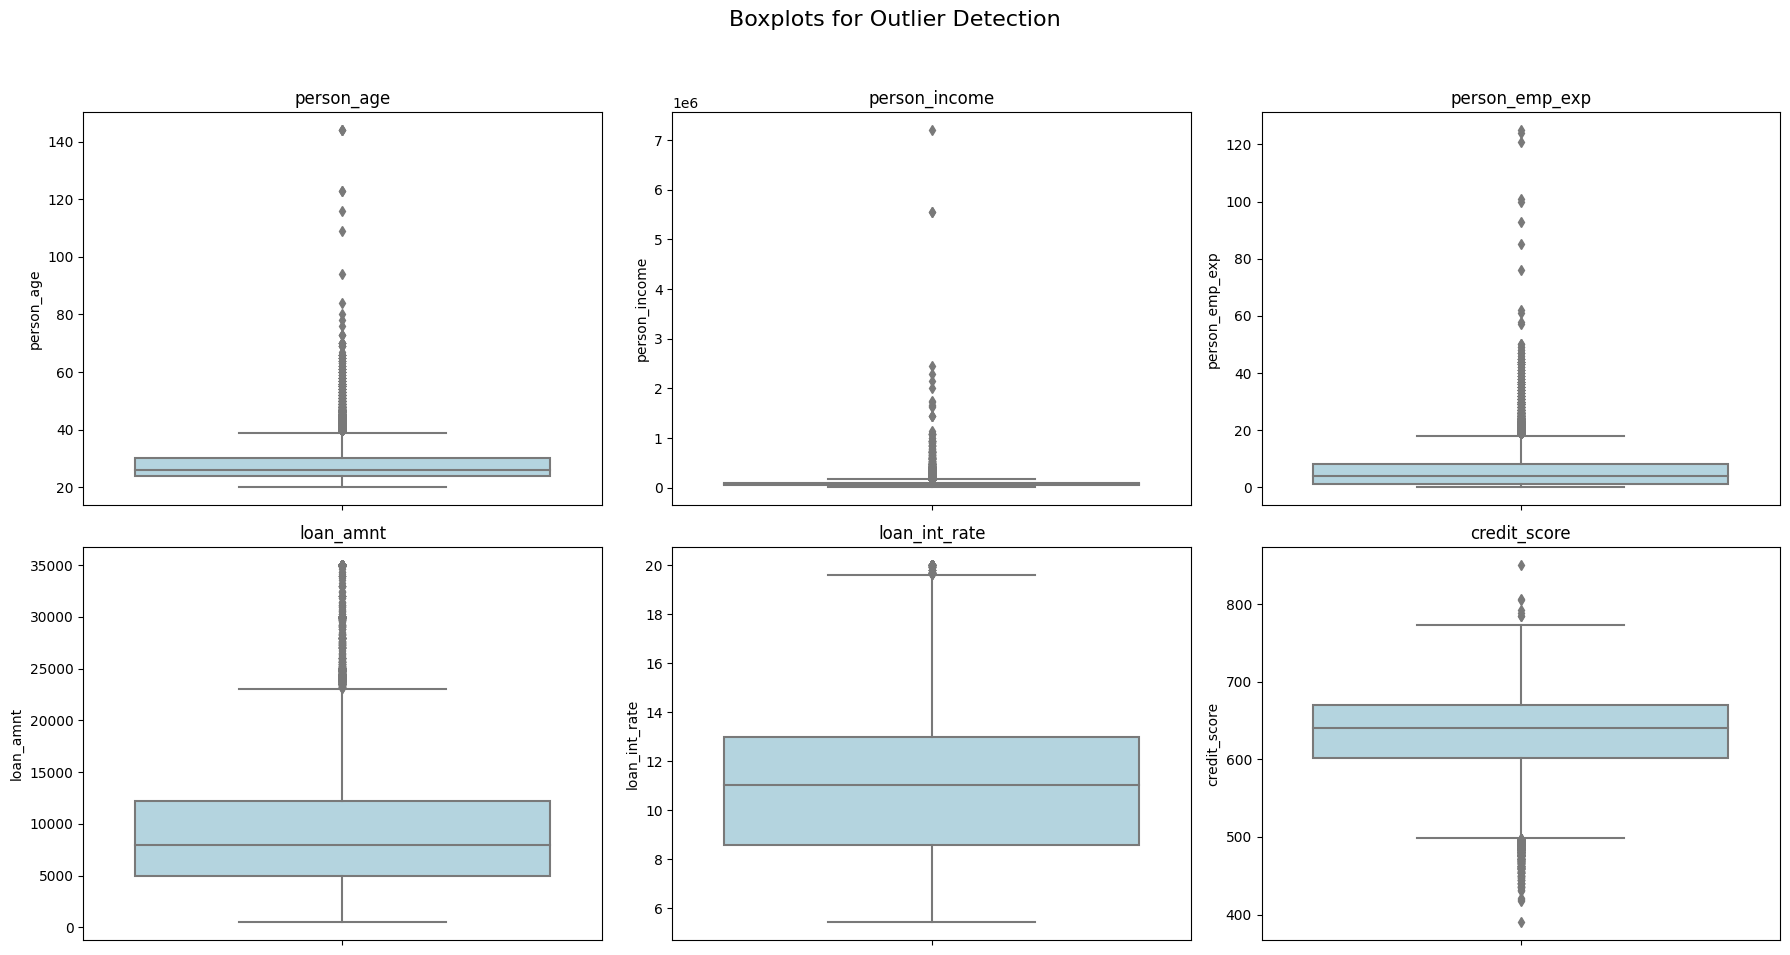

In [14]:
# Create subplots for boxplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16)

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i // 3, i % 3], color="lightblue")
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

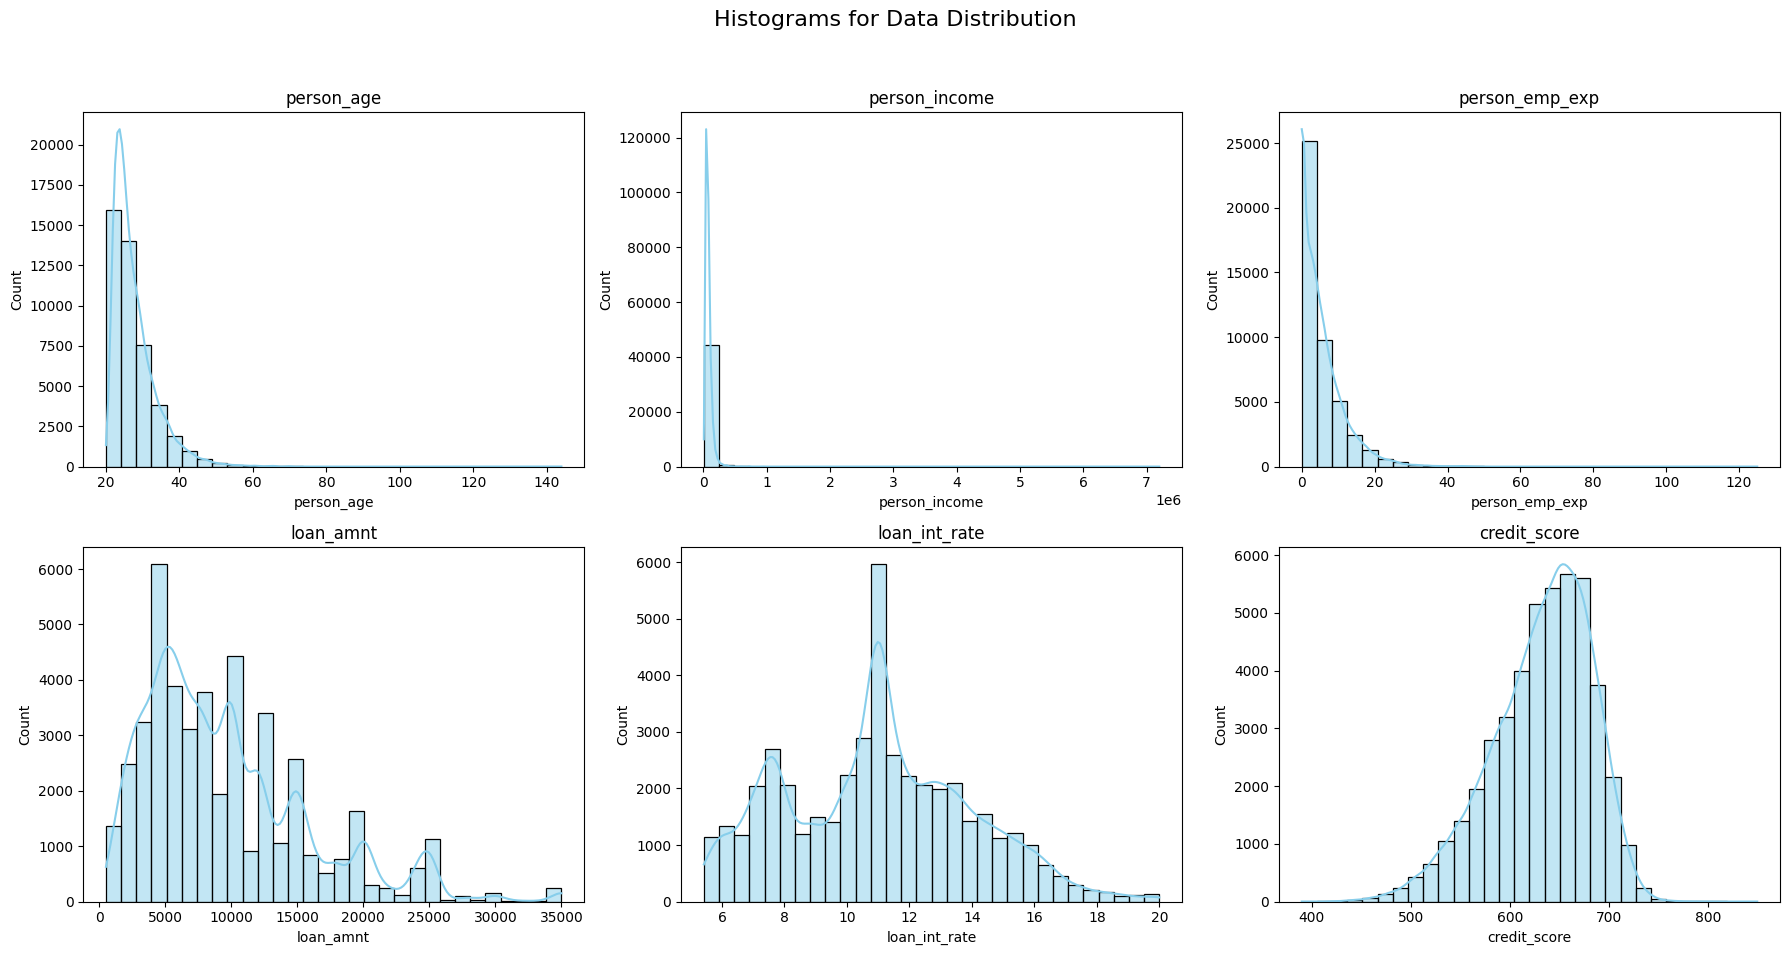

In [15]:
# Create histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Histograms for Data Distribution", fontsize=16)

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3], color="skyblue")
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

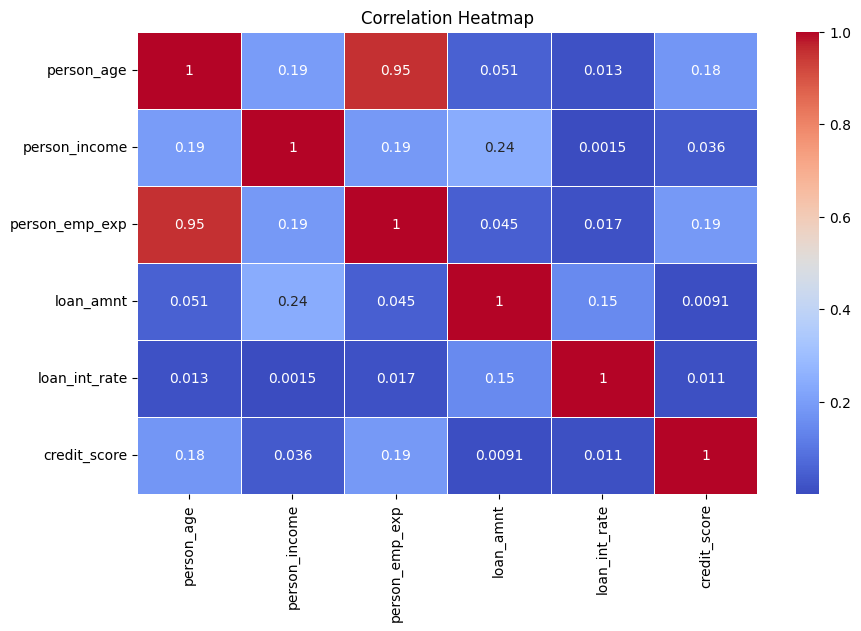

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

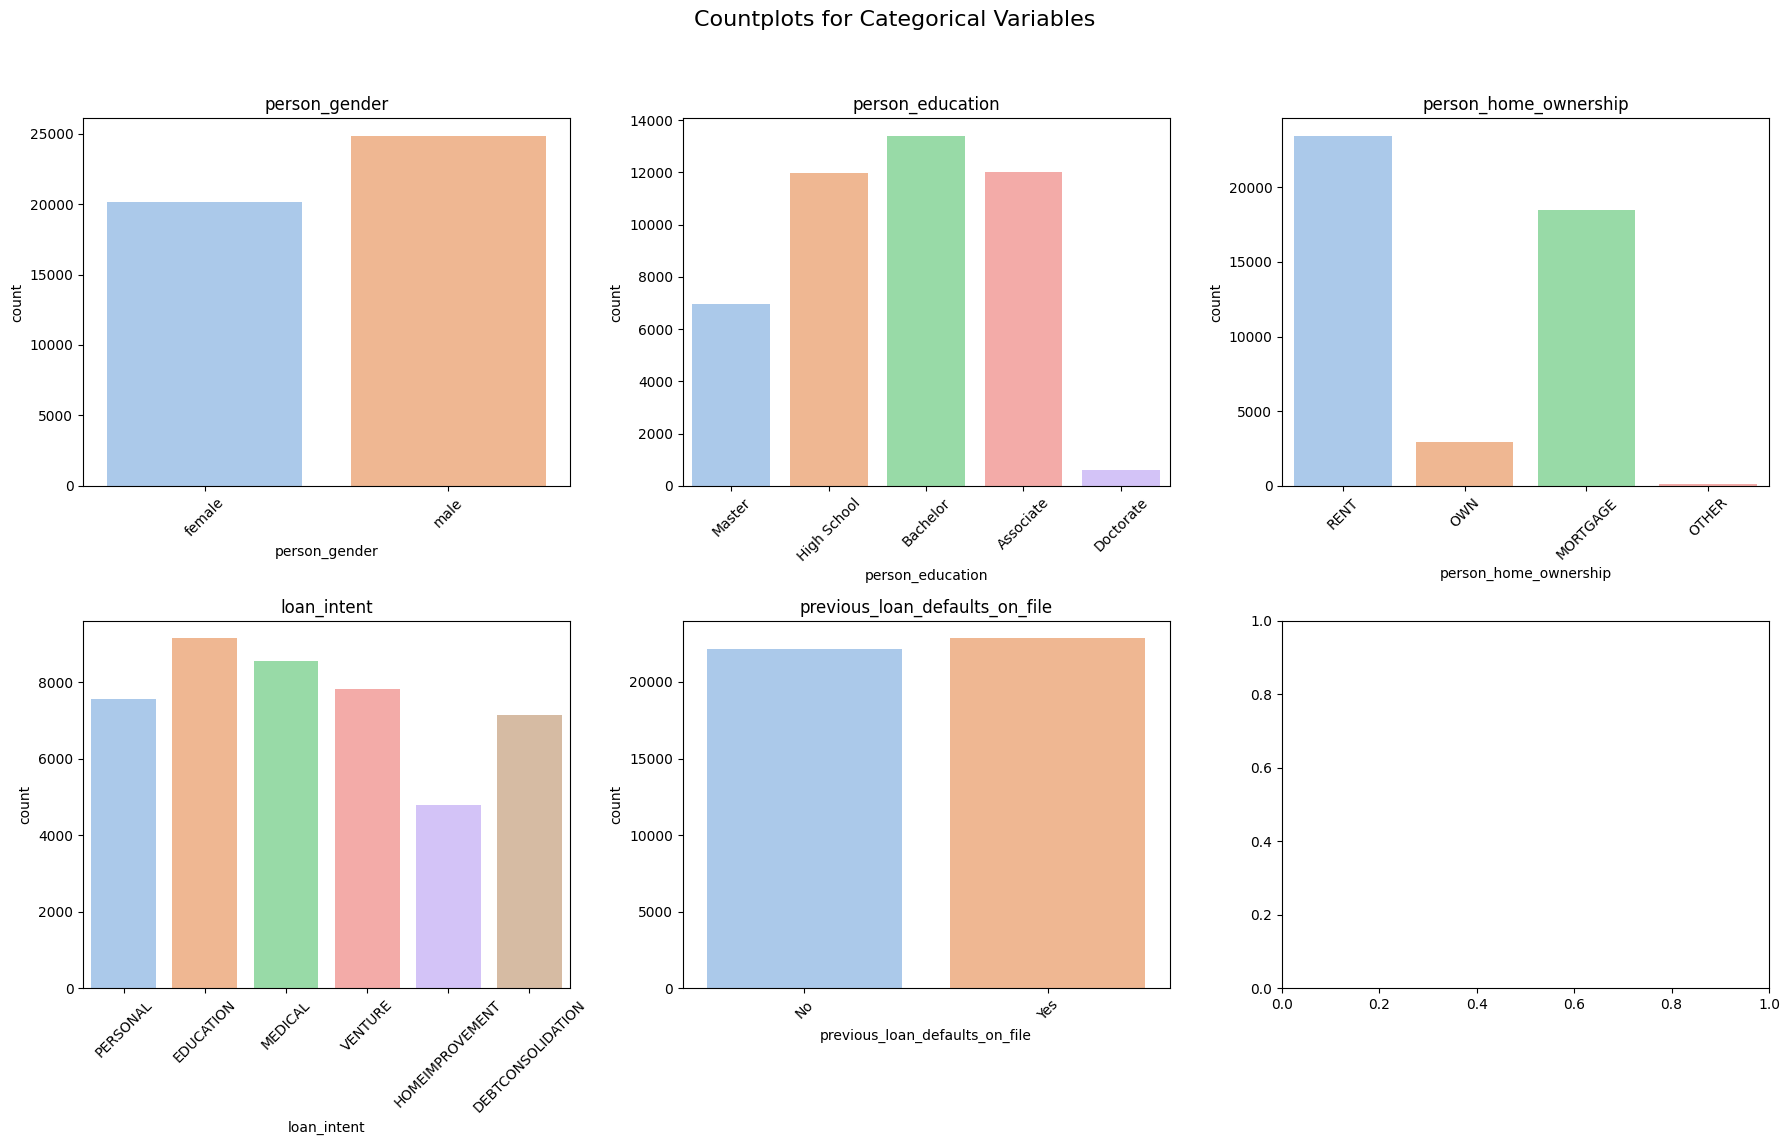

In [17]:
# Countplot for categorical variables
cat_cols = ["person_gender", "person_education", "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle("Countplots for Categorical Variables", fontsize=16)

for i, col in enumerate(cat_cols):
    if i < len(cat_cols):
        sns.countplot(x=df[col], ax=axes[i // 3, i % 3], palette="pastel")
        axes[i // 3, i % 3].set_title(col)
        axes[i // 3, i % 3].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [18]:
# Outlier Detection using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))
print("\nOutliers Detected:")
print(outlier_condition.sum())


Outliers Detected:
person_age        2188
person_income     2218
person_emp_exp    1724
loan_amnt         2348
loan_int_rate      124
credit_score       467
dtype: int64


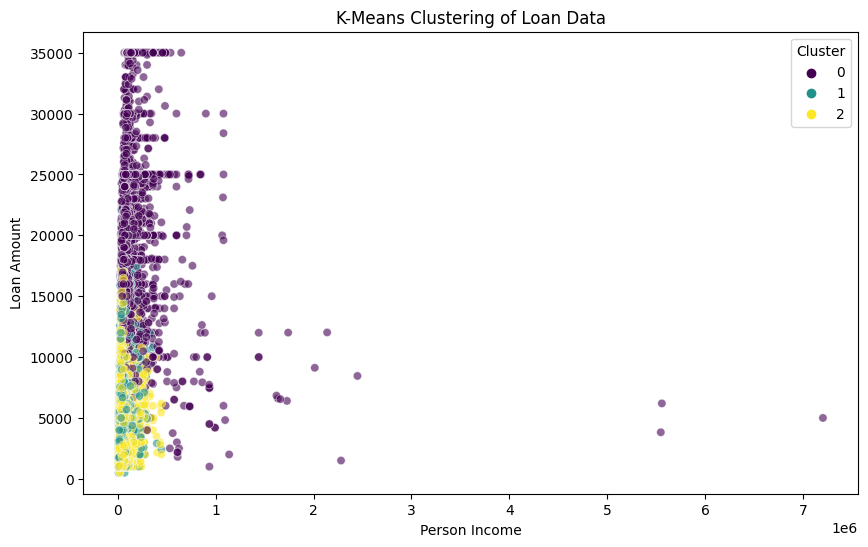

In [19]:
# Select numerical features for clustering
features = ["person_age", "person_income", "loan_amnt", "loan_int_rate", "credit_score"]
df_selected = df[features]

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["person_income"], y=df["loan_amnt"], hue=df["cluster"], palette="viridis", alpha=0.6)
plt.xlabel("Person Income")
plt.ylabel("Loan Amount")
plt.title("K-Means Clustering of Loan Data")
plt.legend(title="Cluster")
plt.show()

# **3. Data Preprocessing and Feature Engineering**

In [20]:
# Binary Encoding for person_gender
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
# Binary Encoding for previous_loan_defaults_on_file
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding for person_education (if applicable)
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 
                   'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_order)

# One-Hot Encoding for person_home_ownership and loan_intent
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)


# Display the transformed DataFrame
print(df.head())


   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 1        12282.0               0   
2        25.0              0                 1        12438.0               3   
3        23.0              0                 3        79753.0               0   
4        24.0              1                 4        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  ...  loan_statu

In [21]:
# Replacing Outliers with Median
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)
df['person_age']

0        22.0
1        21.0
2        25.0
3        23.0
4        24.0
         ... 
44995    27.0
44996    37.0
44997    33.0
44998    29.0
44999    24.0
Name: person_age, Length: 45000, dtype: float64

In [22]:
# Analyze the 'person_age' column
column = 'person_age'
title = column.replace('_', ' ')

# Display summary statistics for person_age
print(f'\nSummary Statistics for {title}:\n', df[column].describe())


Summary Statistics for person age:
 count    45000.000000
mean        27.748156
std          5.909318
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64


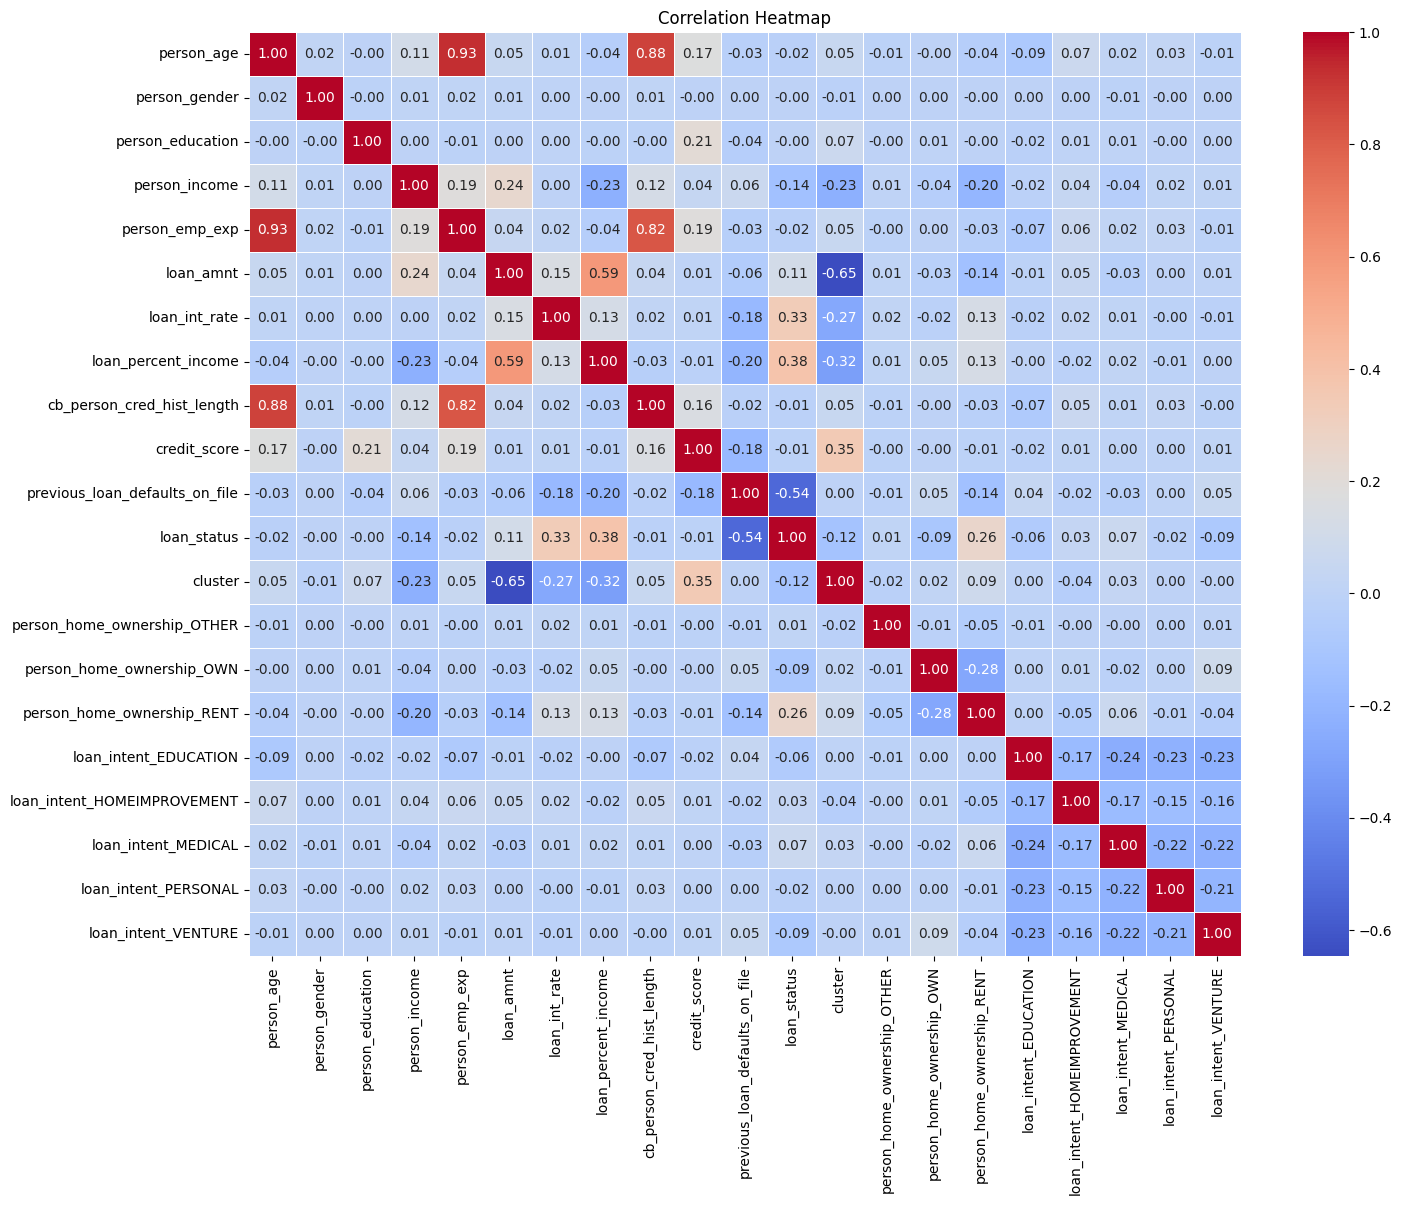

In [23]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **4. Split for test data**

In [24]:
# Separating the features (X) and target variable (y) by dropping 'loan_status' from the DataFrame for X and assigning 'loan_status' to y
X = df.drop(columns=['loan_status'])
y = df.loan_status
# Display the transformed data
display(X.head())
display(y.head())

# Split the data into training and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,cluster,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,0,False,False,True,False,False,False,True,False
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,1,False,True,False,True,False,False,False,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,2,False,False,False,False,False,True,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,0,False,False,True,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,0,False,False,True,False,False,True,False,False


0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [25]:

# Standardizing numerical features for clustering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert scaled arrays back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

# **5. Applying Various Model For Prediction**

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.89      0.77      0.82      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.93      0.93      0.92     13500



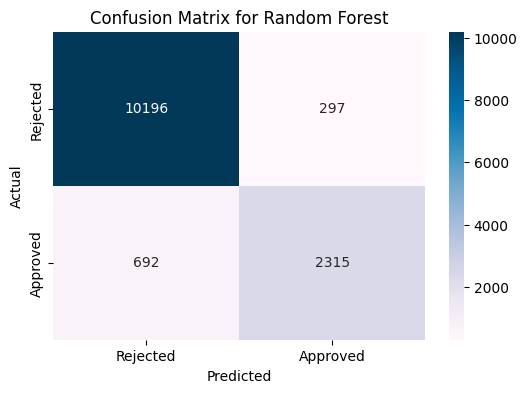



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     10493
           1       0.68      0.38      0.49      3007

    accuracy                           0.82     13500
   macro avg       0.76      0.66      0.69     13500
weighted avg       0.81      0.82      0.80     13500



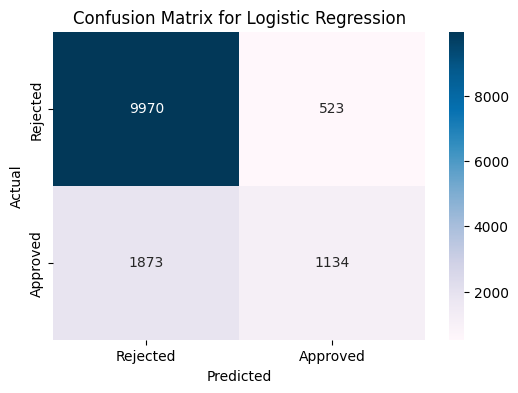



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10493
           1       0.78      0.78      0.78      3007

    accuracy                           0.90     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.90      0.90      0.90     13500



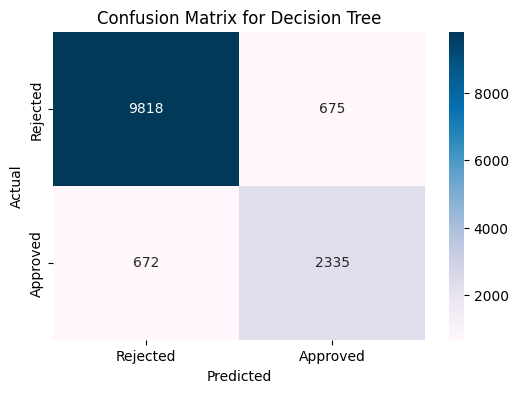



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10493
           1       0.88      0.80      0.84      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.88      0.90     13500
weighted avg       0.93      0.93      0.93     13500



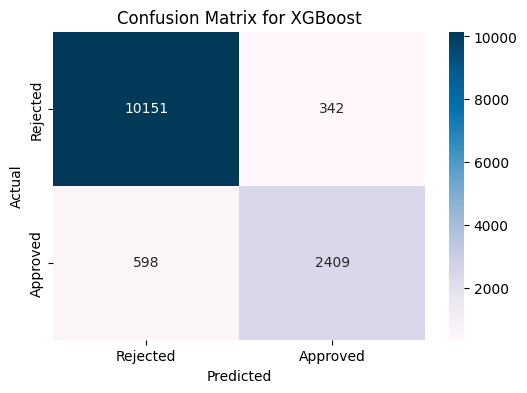



Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.87      0.80      0.83      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.88      0.89     13500
weighted avg       0.93      0.93      0.93     13500



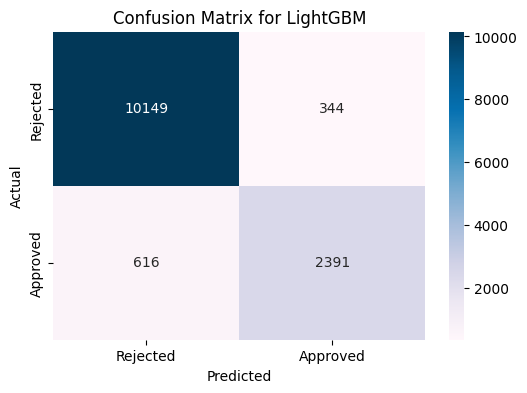



Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10493
           1       0.89      0.80      0.84      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.88      0.90     13500
weighted avg       0.93      0.93      0.93     13500



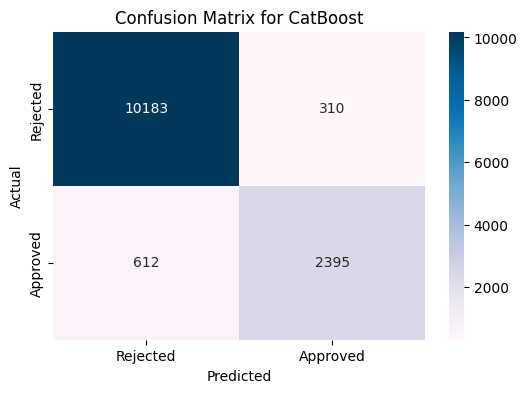



Model Performance Table:


,Model,Train Score,Test Score,Accuracy Score
0,Random Forest,1.000000,0.926741,0.926741
1,Logistic Regression,0.824000,0.822519,0.822519
2,Decision Tree,1.000000,0.900222,0.900222
3,XGBoost,0.969619,0.930370,0.930370
4,LightGBM,0.948921,0.928889,0.928889
5,CatBoost,0.955143,0.931704,0.931704


In [26]:


# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
    
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions on validation set
    y_val_pred = model.predict(X_val)
     
    # Train and Test Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_val, y_val)
    
    # Accuracy Score
    accuracy = accuracy_score(y_val, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_val, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)


# **6. Best Model Selection for Loan Prediction**

In [27]:
# Identify the best model by accuracy
best_model_row = results_df.loc[results_df['Accuracy Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy Score']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Best Model: CatBoost with Accuracy: 0.9317


# 7. Using Shap for model interpretation

In [28]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [29]:
np.shape(shap_values.values)

(45000, 20)

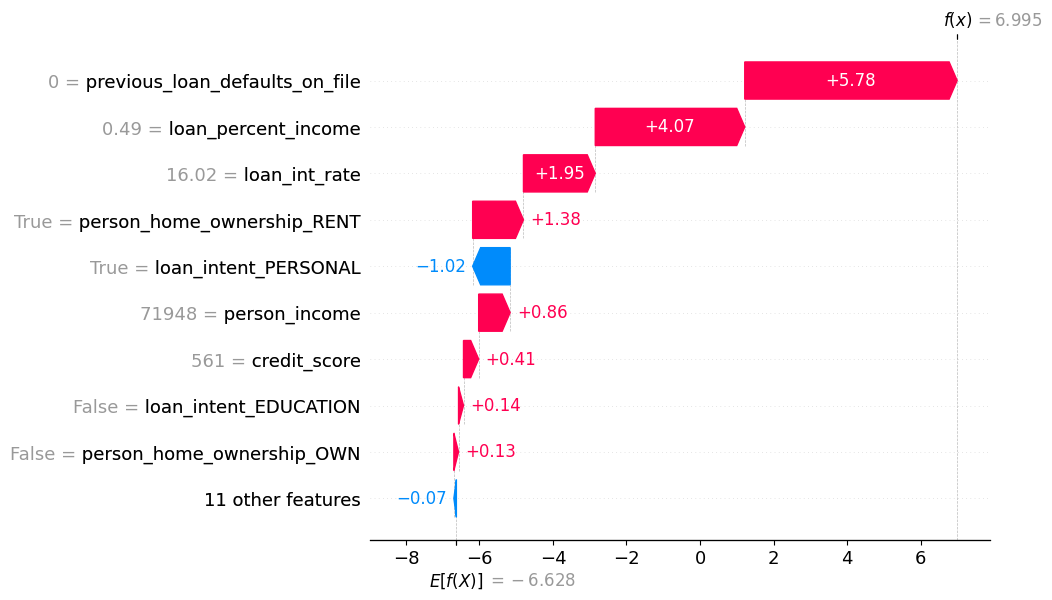

In [30]:
# Waterfall plot for first observations
shap.plots.waterfall(shap_values[0])

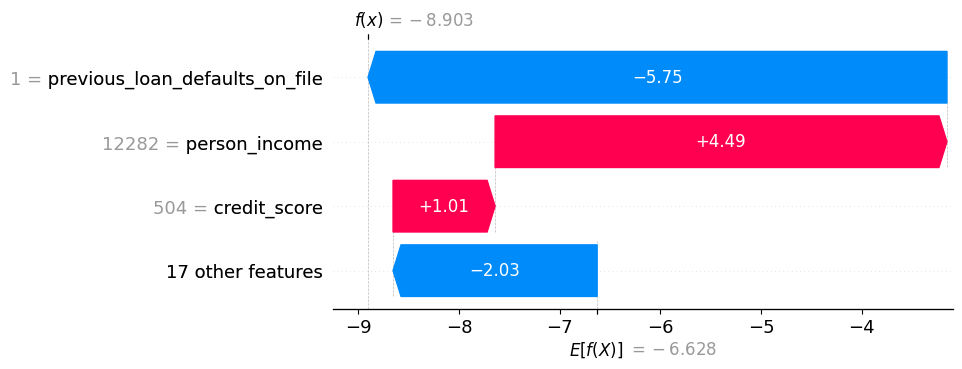

In [31]:
# Waterfall plot containing max_display
shap.plots.waterfall(shap_values[1], max_display=4)

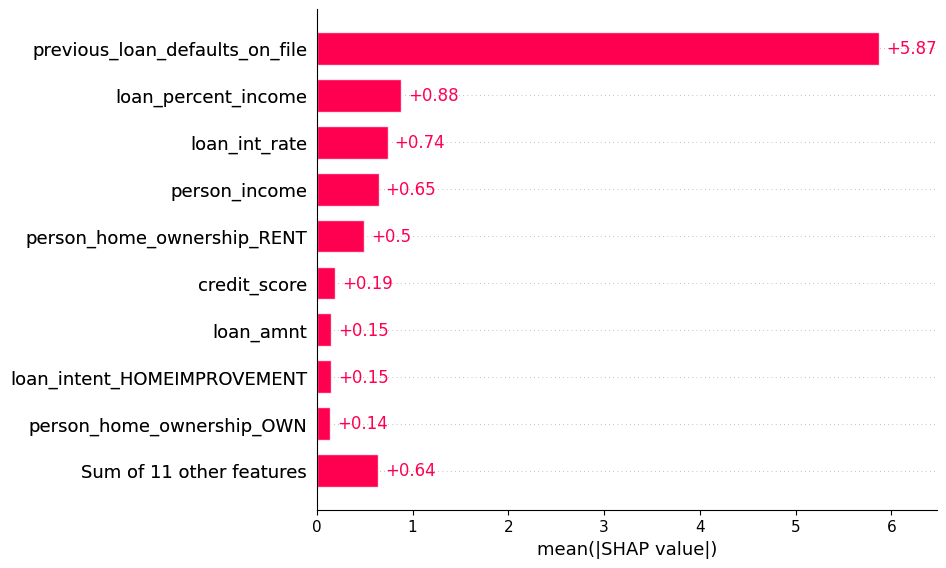

In [32]:
# Bar plot 
shap.plots.bar(shap_values)

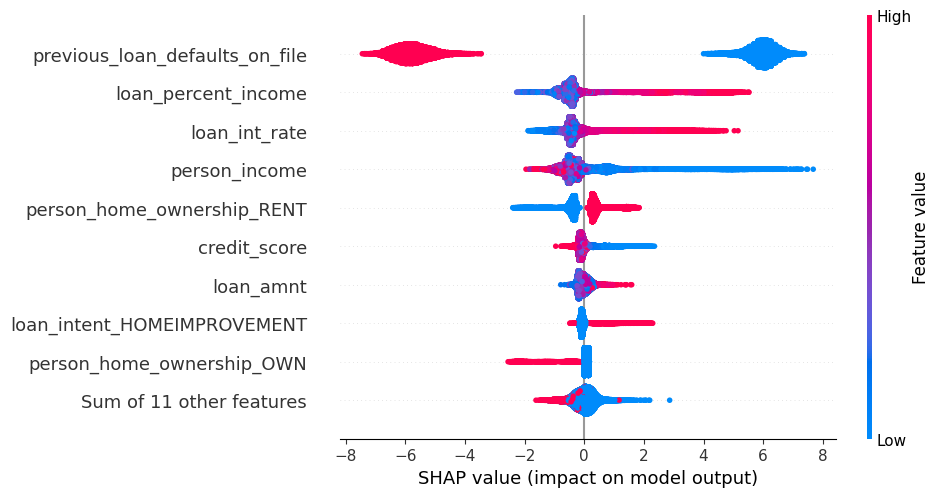

In [33]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [34]:
import pickle
from catboost import CatBoostClassifier

# Train CatBoost model
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Save the model as a .pkl file
with open("catboost_model.pkl", "wb") as file:
    pickle.dump(catboost_model, file)

print("CatBoost model saved successfully!")


CatBoost model saved successfully!


In [35]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Train and save Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

# Train and save Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(lr_model, file)

# Train and save Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
with open("decision_tree_model.pkl", "wb") as file:
    pickle.dump(dt_model, file)

# Train and save XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

# Train and save LightGBM
lgbm_model = LGBMClassifier(verbosity=-1, random_state=42)
lgbm_model.fit(X_train, y_train)
with open("lightgbm_model.pkl", "wb") as file:
    pickle.dump(lgbm_model, file)

print("All models have been trained and saved successfully!")


All models have been trained and saved successfully!
